# Notebook to describe the analytically expected orbital evolution of systems in the "stable MT channel" 

In other words, binary systems going through 2 phases of stable mass transfer.



In [64]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import astropy.units as u
from astropy import constants as const

import seaborn as sns


print(pd.__version__)
print(np.__version__)

######################################
## PLOT setttings
plt.rc('font', family='serif')
from matplotlib import rc
import matplotlib
matplotlib.rcParams['mathtext.fontset'] = 'stix'
matplotlib.rcParams['font.family'] = 'STIXGeneral'
rc('text', usetex=False)
fsize, SMALL_SIZE, MEDIUM_SIZE, BIGGER_SIZE = 30,18,25,30
for obj in ['axes','xtick','ytick']:
    plt.rc(obj, labelsize=MEDIUM_SIZE)          # controls default text sizes
for obj in ['figure','axes']:
    plt.rc(obj, titlesize=BIGGER_SIZE)    # fontsize of the tick labels
plt.rc('font', size=MEDIUM_SIZE)          # controls default text sizes
plt.rc('legend', fontsize=SMALL_SIZE)    # legend fontsize


######################################
# home_dir = os.path.expanduser("~") 
# Zenodo_data_dir = f'{home_dir}/ceph/CompasOutput/Zenodo_vanSon2024' # change to your local path 
# root_out_dir    = Zenodo_data_dir  # {home_dir}/ceph/CompasOutput/{compas_v}/{sim_name} compas_v = "v03.01.02" sim_name = "NewWinds_RemFryer2012"# sim_name determines which flags to run COMPAS with



1.5.3
1.26.4


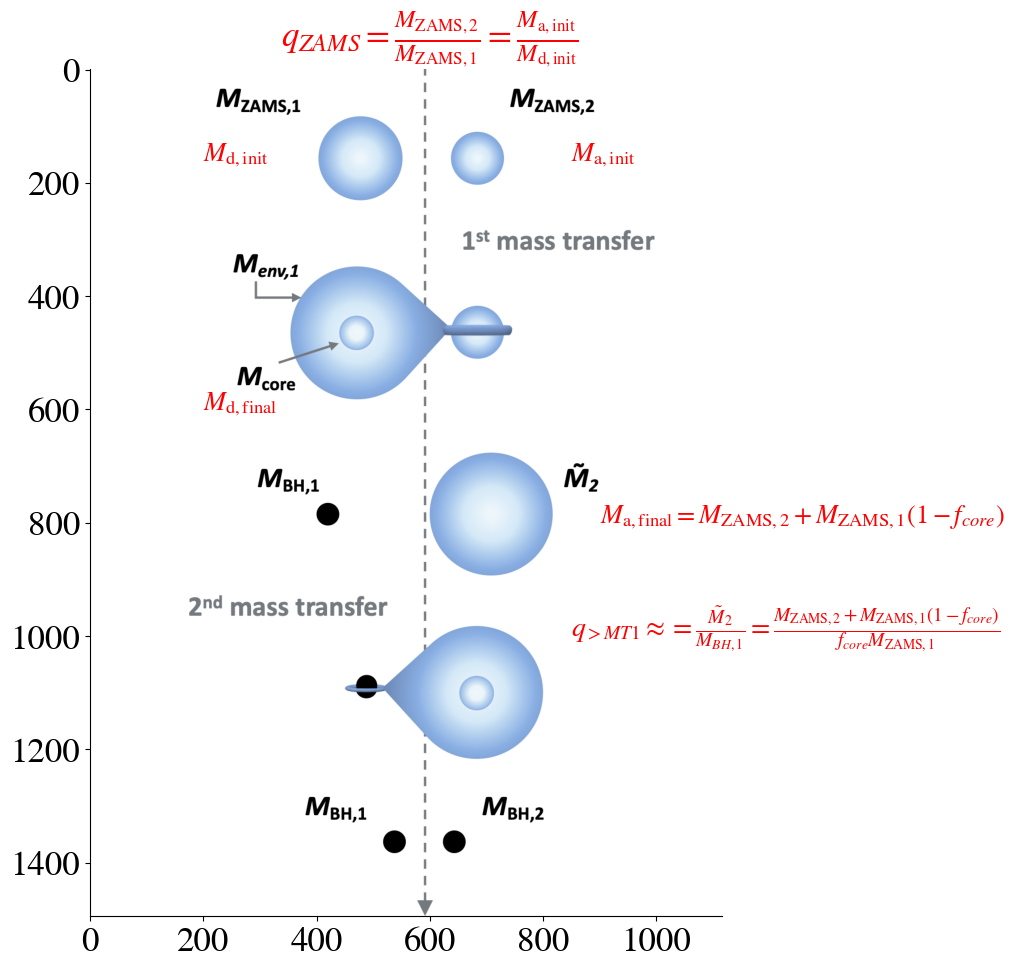

In [2]:
fig, ax = plt.subplots(figsize = (15, 11))

img = plt.imread('../../plots/Cartoons_StableRLOF_channel_1.png') 
ax.imshow(img)

ax.text(600, -40, r'$q_{ZAMS} =\frac{M_{\mathrm{ZAMS,2} }}{M_{\mathrm{ZAMS,1} }} =  \frac{M_{\mathrm{a, init} }}{M_{\mathrm{d, init} }}$',
        size =25, c='r', ha = 'center')

ax.text(200, 160, '$M_{\mathrm{d, init} }$', size = 19, c = 'r')
ax.text(850, 160, '$M_{\mathrm{a, init} }$', size = 19, c = 'r')

ax.text(200, 600, '$M_{\mathrm{d, final} }$', size = 19, c = 'r')
ax.text(900, 800, r'$M_{\mathrm{a, final} } = M_{\mathrm{ZAMS,2}} + M_{\mathrm{ZAMS,1}}(1-f_{core})$', size = 19, c = 'r')


ax.text(850, 1000, r'$q_{> MT1} \approx = \frac{\tilde{M}_2}{M_{BH,1}} = \frac{M_{\mathrm{ZAMS,2}} + M_{\mathrm{ZAMS,1}}(1-f_{core})}{f_{core}M_{\mathrm{ZAMS,1}} }$', 
        size = 20, c = 'r')

# Hide the right and top spines
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)


plt.show()

## First mass transfer:


### For the fully conservative case we have:

\begin{equation}
\Large \frac{a_{f}}{a_{i}} = \left( \frac{M_{d,init} \ M_{a, init} }{ M_{d, fin} \ M_{a, fin} }    \right)^2
\end{equation}


### Or in terms of $Q_{ZAMS}$ and $f_{core}$

\begin{equation}
\Large \frac{a_{f}}{a_{i}} = \left( \frac{ Q_{\mathrm{ZAMS}} }{ f_{core,1} \left[ Q_{\mathrm{ZAMS}} + (1 - f_{core,1}) \right]  }    \right)^2
\end{equation}



lets code this up:



In [3]:
##############
def Orbital_evol_conservative(Q_ZAMS, f_core = 0.3):
    #Q_ZAMS = M2/M1
    afinal_ainit = (Q_ZAMS/(f_core*(Q_ZAMS + (1 - f_core) )) )**2
    return afinal_ainit


    

### More general case: for different $\beta$ assumptions

from Soberman 1997 equation 34


In [4]:
def a_f_a_i_Soberman_general(q0, q, beta = 1.0):
    """
    q0 = 
    q = 
    beta = 
    out:
    final over initial separation 
    """
    # Equation 34
    af_ai = (q0/q)**2 * (1+q0)/(1+q) * ((1+(1-beta)*q)/(1+(1-beta)*q0))**(5 + (2*beta)/(1-beta))
    return af_ai
    

# Second mass transfer phase

### Typically assumed NON- Conservative case <font size="5">$\beta = 0$</font> 

The second mass transfer episode (from star to compact object) is essentially the same as $\beta = 0$ when we assume that the mass transfer is Eddington limited.

Below we show what all the variables correspond to in this case

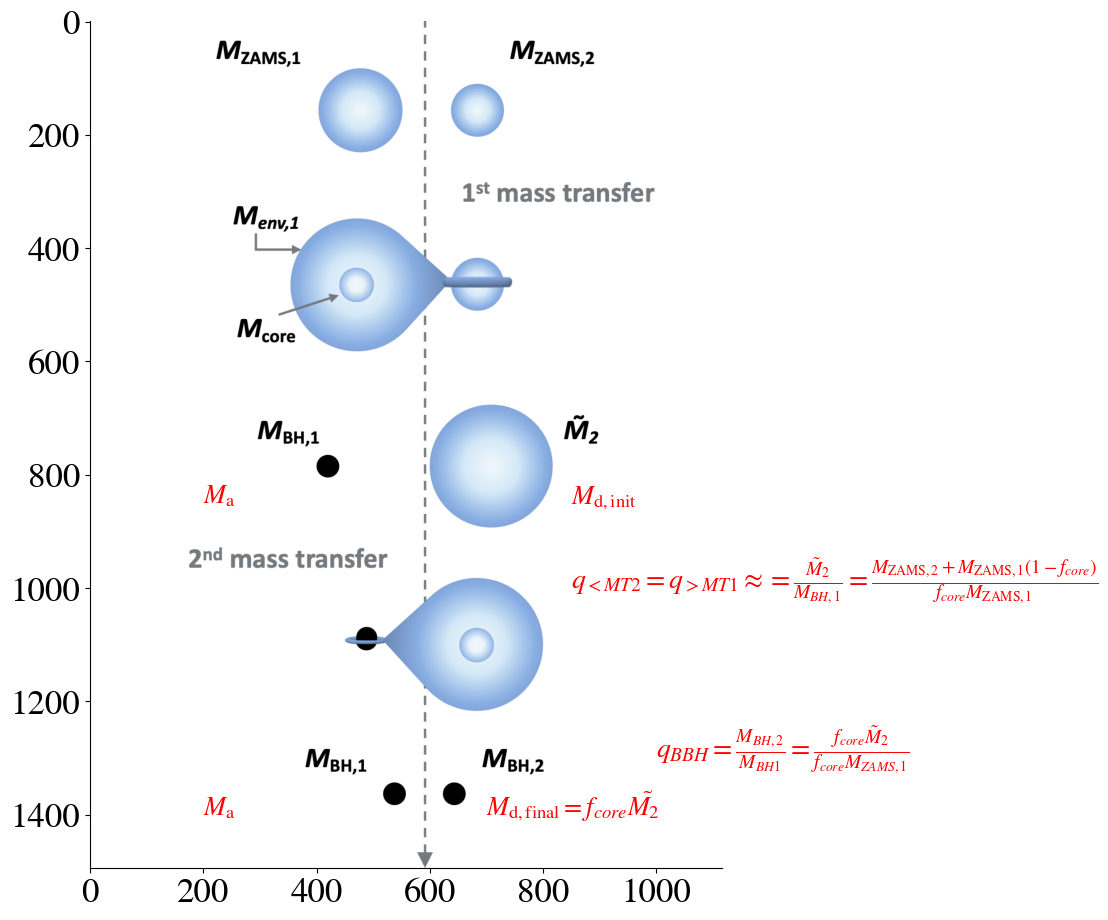

In [22]:
fig, ax = plt.subplots(figsize = (15, 11))

img = plt.imread('../../plots/Cartoons_StableRLOF_channel_1.png') 
ax.imshow(img)

ax.text(200, 850, '$M_{\mathrm{a} }$', size = 19, c = 'r')
ax.text(850, 850, '$M_{\mathrm{d, init} }$', size = 19, c = 'r')

ax.text(200, 1400, '$M_{\mathrm{a} }$', size = 19, c = 'r')
ax.text(700, 1400, r'$M_{\mathrm{d, final} } = f_{core} \tilde{M_2}$', size = 19, c = 'r')

ax.text(850, 1000, r'$q_{< MT2} = q_{> MT1} \approx = \frac{\tilde{M}_2}{M_{BH,1}} = \frac{M_{\mathrm{ZAMS,2}} + M_{\mathrm{ZAMS,1}}(1-f_{core})}{f_{core}M_{\mathrm{ZAMS,1}} }$', 
        size = 20, c = 'r')


ax.text(1000, 1300, r'$q_{BBH} = \frac{M_{BH,2}}{M_{BH1}} = \frac{f_{core}\tilde{M}_2}{f_{core} M_{ZAMS,1}}$', 
        size = 20, c = 'r')

# Hide the right and top spines
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

plt.show()

As shown in the cartoon above, we have:
* $M_{d, init} = \tilde{M}_2$
* $M_{d, fin} \approx M_{BH,2} = f_{core,2}\tilde{M}_2$
* $M_{a}      = M_{BH,1} = f_{core,1}\tilde{M}_{ZAMS,1}$


Substituting this, we get:


\begin{equation}
\frac{a_{f}}{a_{i}} = \left(\frac{\tilde{M}_2}{f_{core,2} \tilde{M}_2} \right)^2 \left(\frac{\tilde{M}_2 + M_{BH,1}}{f_{core,2}\tilde{M}_2 + M_{BH,1} } \right)  \exp\left[ 2 \left(\frac{f_{core,2}\tilde{M}_2 - \tilde{M}_2 }{M_{BH,1} }\right) \right] 
\end{equation}


\begin{equation}
\frac{a_{f}}{a_{i}} = \left(\frac{1}{f_{core,2} } \right)^2 \left(\frac{\tilde{M}_2 + M_{BH,1}}{f_{core,2}\tilde{M}_2 + M_{BH,1} } \right)  \exp\left[ 2 \left(\frac{\tilde{M}_2( f_{core,2} - 1) }{M_{BH,1} }\right) \right] 
\end{equation}

Now we introduce a new variatble, the mass ratio at onset of masstransfer:

$\large Q_{<MT2} \equiv \tilde{M}_2 / M_{BH,1}$

substituting this we get:

\begin{equation}
 = \left(\frac{1}{f_{core,2} } \right)^2 
\left(\frac{ \frac{\tilde{M}_2}{M_{BH,1}} + \frac{M_{BH,1}}{M_{BH,1}} }{ \frac{f_{core,2}\tilde{M}_2}{M_{BH,1}} + \frac{M_{BH,1}}{M_{BH,1}} } \right)  
\exp\left[ 2 \left( Q_{<MT2}( f_{core,2} - 1) \right) \right] 
\end{equation}


\begin{equation}
= \left(\frac{1}{f_{core,2} } \right)^2 
\left(\frac{Q_{<MT2} + 1 }{ f_{core,2}Q_{<MT2} + 1 } \right)  
\exp\left[ 2  Q_{<MT2}( f_{core,2} - 1) \right] 
\end{equation}

## In terms of $Q_{< MT2} \approx Q_{> MT1} $ and $f_{core}$ 


\begin{equation}
\Large \boxed{ \frac{a_{f}}{a_{i}} = \frac{1}{f_{core,2}^2}  \left( \frac{Q_{<MT2} + 1}{f_{core,2}Q_{<MT2} + 1} \right)  \exp\left[ 2 Q_{<MT2} (f_{core,2} - 1) \right] }
\end{equation}



## Where we can express $Q_{< MT2}$ in terms of $Q_{ZAMS}$ and $f_{core}$

\begin{equation}
Q_{< MT2} \equiv \tilde{M}_2 / M_{BH,1} = \frac{M_{ZAMS,2} + M_{ZAMS,1}(1-f_{core,1}) }{f_{core,1} M_{ZAMS,1}}
\end{equation}

\begin{equation}
= \frac{M_{ZAMS,2}}{f_{core,1} M_{ZAMS,1}} + \frac{M_{ZAMS,1}(1-f_{core,1}) }{f_{core,1} M_{ZAMS,1}}
\end{equation}

using that $Q_{ZAMS} \equiv M_{ZAMS,2}/M_{ZAMS,1}$


\begin{equation}
= \frac{Q_{ZAMS}}{f_{core,1}} + \frac{(1-f_{core,1}) }{f_{core,1}}
\end{equation}

\begin{equation}
 \Large \boxed{ Q_{< MT2} = \frac{Q_{ZAMS} + (1 - f_{core,1})}{f_{core,1}} }
\end{equation}


### lets code this up:


In [23]:
##############
# Orbital evolution starting from the initial and final donor mass and the accretor mass
def Orbital_evol_NONconservative_pure(Md_init, Md_fin, Ma):
    afinal_ainit = (Md_init/Md_fin)**2 * (Md_init + Ma)/(Md_fin + Ma) * np.exp(2 * (Md_fin - Md_init)/Ma)
    return afinal_ainit

##############
def Orbital_evol_NONconservative(Q_preMT, f_core2 = 0.3):
    #Q_preMT = \tilde{M_2}/M_BH,1
    afinal_ainit = (1./f_core2)**2 * (Q_preMT + 1)/(f_core2*Q_preMT + 1) * np.exp(2*Q_preMT*(f_core2 - 1))
    return afinal_ainit


##############
def QpreMT2(Q_ZAMS, f_core1 = 0.3, beta = 1.):
    return (Q_ZAMS + beta*(1-f_core1))/f_core1




# Let's go into flappy bird mode!


We are going to define the orbital widening factor and mass ratio at every step. Namely

1. ### ZAMS (pre MT1): 

    1. $\large q_{\mathrm{ZAMS}} = M_{\mathrm{ZAMS,2} }/M_{\mathrm{ZAMS,1} } $
    
    2. $\large a = a_{\mathrm{ZAMS} }$
    
2. ### post MT1 (pre MT2):

    1. $\large q_{>MT1} \approx \tilde{M}_2/M_{BH,1} = \frac{M_{ZAMS,2} + M_{ZAMS,1} (1-f_{core}) }{f_{core} M_{ZAMS,1}}$
    
    2. $\large a_{post MT1} = a_{\mathrm{ZAMS}} \omega_1 $


3. ### post MT 2 (at BBH form):
    
    1. $\large q_{BBH} = M_{BH,2}/M_{BH,1}$
    
    2. $\large a_{post MT2} = a_{post MT1} \omega_2 $


Here $\omega_1$ and $\omega_2$ are the orbital widening factors as defined above (i.e. $a_{final}/a_{initial}$.


\begin{equation}
\begin{split}
q_{BBH} \equiv M_{BH,2}/M_{BH,1} = 
\frac{f_{core}\tilde{M}_2}{f_{core}M_{ZAMS,1} } = 
\frac{M_{ZAMS,2} + M_{ZAMS,1}(1-f_{core}) }{ M_{ZAMS,1} }  =
\frac{\frac{M_{ZAMS,2}}{M_{ZAMS,1}} + (1-f_{core}) }{1 } 
\end{split}
\end{equation}

*** 
\begin{equation}
\large q_{BBH} = Q_{ZAMS} + 1 - f_{core}
\end{equation}

In [24]:
# Assumes you provide the initial separation and m1 with units
# I'm writing m2 in terms of Q_BBH = MBH2/MBH1 <--> m2 = m1 * Q_BBH
def GW_inspiral_time_circular(a0, m1, Q_BBH):
    # Equations 5.9 and 5.10 From peters 64 
    a0 = a0.to(u.m)
    m1 = m1.to(u.kg)
    m2 = m1 * Q_BBH
    beta_peters = 64/5 * const.G**3/const.c**5 * m1 * m2 * (m1 + m2)
    t_merge = a0**4/(4*beta_peters)
    return t_merge.to(u.Gyr)
    
# GW_inspiral_time_circular(10*u.Rsun, 30*u.Msun, 0.7)
    

In [188]:
import numpy as np
import astropy.units as u

def Orbital_evol_conservative(Q_ZAMS, f_core = 0.3):
    #Q_ZAMS = M2/M1
    afinal_ainit = (Q_ZAMS/(f_core*(Q_ZAMS + (1 - f_core) )) )**2
    return afinal_ainit

def a_f_a_i_Soberman_general(q0, q, beta = 1.0):
    """
    q0 = 
    q = 
    beta = 
    out:
    final over initial separation 
    """
    # Equation 34
    afinal_ainit = (q0/q)**2 * (1+q0)/(1+q) * ((1+(1-beta)*q)/(1+(1-beta)*q0))**(5 + (2*beta)/(1-beta))
    return afinal_ainit

def a_f_a_i_Soberman_general(q0, q, beta = 0.99):
    """
    eq. 34 from Soberman et al. 1997
    q :  post MT mass ratio 
    q0 : pre MT mass ratio 
    beta : mass transfer efficiency
    Returns: orbital widening afinal/ainitial.
    """
    term1 = (q0 / q)**2
    term2 = (1 + q0) / (1 + q)
    term3 = (1 + (1 - beta) * q) / (1 + (1 - beta) * q0)
    exponent = 5 + (2 * beta)/ (1 - beta)
    afinal_ainit = term1 * term2 * (term3**exponent)

    return afinal_ainit


def Orbital_evol_NONconservative(Q_preMT, f_core2 = 0.3):
    #Q_preMT = \tilde{M_2}/M_BH,1
    afinal_ainit = (1./f_core2)**2 * (Q_preMT + 1)/(f_core2*Q_preMT + 1) * np.exp(2*Q_preMT*(f_core2 - 1))
    return afinal_ainit

def QpreMT2(Q_ZAMS, f_core1 = 0.3, beta = 1.):
    return (Q_ZAMS + beta*(1-f_core1))/f_core1

# Assumes you provide the initial separation and m1 with units
# I'm writing m2 in terms of Q_BBH = MBH2/MBH1 <--> m2 = m1 * Q_BBH
def GW_inspiral_time_circular(a0, m1, Q_BBH):
    # Equations 5.9 and 5.10 From peters 64 
    a0 = a0.to(u.m)
    m1 = m1.to(u.kg)
    m2 = m1 * Q_BBH
    beta_peters = 64/5 * const.G**3/const.c**5 * m1 * m2 * (m1 + m2)
    t_merge = a0**4/(4*beta_peters)
    return t_merge.to(u.Gyr)


def get_orbital_evolution(a_init, q_ZAMS, fc=0.35, q_crit=0.2, M1_ZAMS=25 * u.Msun):
    """
    a_init  -----> array: ZAMS separation in Rsun
    q_ZAMS  -----> float: ZAMS mass ratios M_2ZAMS/M_1ZAMS 
    M1_ZAMS -----> Initial mass of primary in Msun (only needed for t_c calculation in final step)
    fc      -----> core mass fraction
    q_crit  -----> minimal mass ratio for stable mass transfer
    """
    # Ensure q_ZAMS is an array
    q_ZAMS = np.asarray(q_ZAMS)

    # ZAMS situation
    a_pre_MT1 = a_init
    q_pre_MT1 = q_ZAMS

    # Mass ratio evolution
    q_pre_MT2 = QpreMT2(q_pre_MT1, f_core1=fc) #post MT 1 (pre MT 2)
    Q_BBH = q_ZAMS + 1 - fc  # = M_BH2/M_BH1

    # Check for stability
    stableMT1_bool = q_ZAMS >= q_crit

    #######################
    # First mass transfer
    #######################
    # Widening factor after first mass transfer (afinal/ainit)
    omega_1 = a_f_a_i_Soberman_general(q_pre_MT1, q_pre_MT2, beta = 0.99)
    # omega_1 = Orbital_evol_conservative(q_pre_MT1, f_core=fc)
    a_post_MT1 = np.zeros_like(a_pre_MT1)
    if stableMT1_bool:
        a_post_MT1 = a_pre_MT1 * omega_1
    # if not stable, stop and return 0
    else:
        separations = np.array([a_init, a_pre_MT1, 0, 0, 0])
        mass_ratios = np.array([q_ZAMS, q_pre_MT1, 0, 0, 0])
        return separations, mass_ratios
    


    #######################
    # Second mass transfer
    #######################
    # Check for stability (q_pre_MT2 is defined as Md/Ma, so we need the inverse)
    stableMT2_bool = 1. / q_pre_MT2 >= q_crit

    # Widening factor for second mass transfer (afinal/ainit)
    omega_2 = Orbital_evol_NONconservative(q_pre_MT2, f_core2=fc)
    a_post_MT2 = np.zeros_like(a_post_MT1)
    if stableMT2_bool:
        a_post_MT2 = a_post_MT1 * omega_2
    # if not stable, stop and return 0
    else:
        separations = np.array([a_init, a_pre_MT1, a_post_MT1, 0, 0])
        mass_ratios = np.array([q_ZAMS, q_pre_MT1, q_pre_MT2, 0, 0])
        return separations, mass_ratios

    #######################
    # GW coalescence
    #######################
    M_BH1   = fc * M1_ZAMS

    # check if you would merge within a Hubble time
    t_inspiral = GW_inspiral_time_circular(a_post_MT2, M_BH1, Q_BBH)
    merges_in_hubble_time = t_inspiral < 13.7*u.Gyr

    a_final = np.where(merges_in_hubble_time, a_post_MT2, 0 * u.Rsun)        
    Q_final = Q_BBH

    # Define vectors for separations and mass ratios
    separations = np.array([a_init, a_pre_MT1, a_post_MT1, a_post_MT2, a_final])
    mass_ratios = np.array([q_ZAMS, q_pre_MT1, q_pre_MT2, Q_BBH, Q_final])

    return separations, mass_ratios, t_inspiral

# Example usage
a_init = np.array([10, 100, 1000]) * u.Rsun  # Example initial separations in Rsun
q_ZAMS = 0.4  # Example mass ratios
separations, mass_ratios, t_inspiral = get_orbital_evolution(a_init, q_ZAMS, fc=0.35, q_crit=0.2, M1_ZAMS=15 * u.Msun)

print("Separations:", separations)
print("Mass Ratios:", mass_ratios)
print("Inspiral Time:", t_inspiral)

Separations: [[  10.          100.         1000.        ]
 [  10.          100.         1000.        ]
 [  11.16756355  111.67563549 1116.75635487]
 [   3.60064243   36.00642428  360.06424278]
 [   3.60064243    0.            0.        ]]
Mass Ratios: [0.4  0.4  3.   1.05 1.05]
Inspiral Time: [8.10553352e-02 8.10553352e+02 8.10553352e+06] Gyr


In [189]:
print(separations[:,0])

[10.         10.         11.16756355  3.60064243  3.60064243]


q 0.25
q 0.5
q 0.75
q 1.0


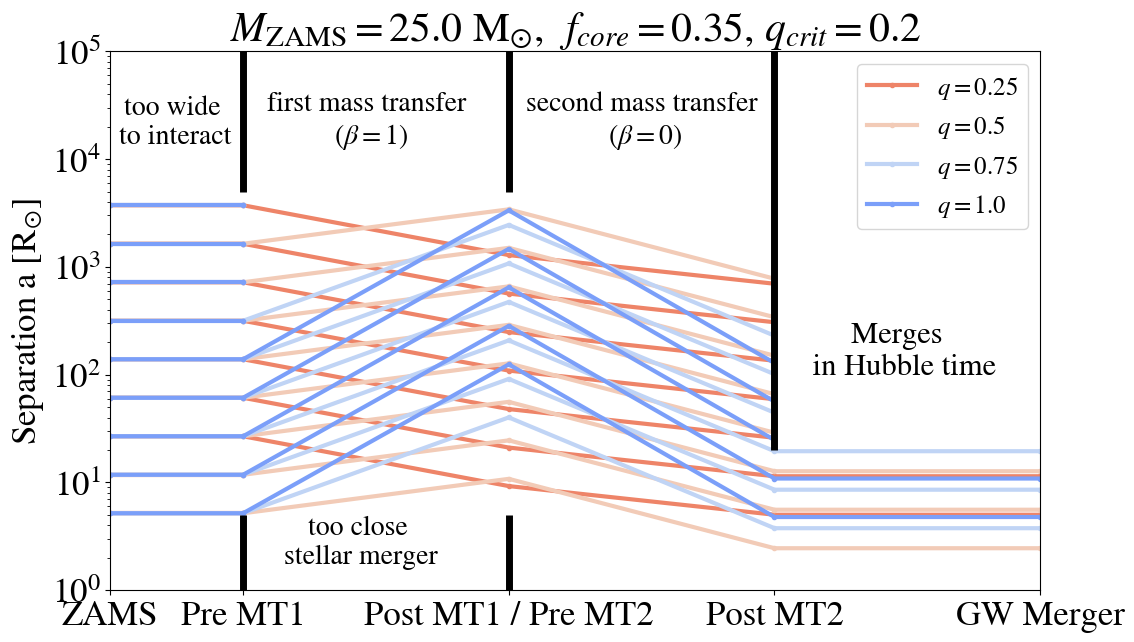

In [202]:

def Flappy_bird_plot(fc=0.35, q_crit=0.2, M1_ZAMS=30 * u.Msun):
    # values to run over (ZAMS separations and mass ratios)
    a_init  = np.logspace(0,5, num =15)* u.Rsun
    q_ZAMS = np.array([0.25, 0.5, 0.75, 1.0])#np.arange(0.2,1.2, 0.2)

    # What is the maximum separation for which we think the stars would still interact? 
    max_sep_interaction = 5e3 # Rsun
    # What is the minimum separation below which we think the stars would merge?
    min_sep_interaction = 5 # Rsun

    # X_values for plotting
    x_points = np.array([0, 2, 6, 10, 14])

    q_colors             = sns.color_palette("coolwarm_r", len(np.unique(q_ZAMS)+1))

    ###############
    fig, ax = plt.subplots(figsize = (12,7) )

    for q_i, q in enumerate(q_ZAMS):
        print('q',q)
        # Compute the analytically expected orbital evolution
        separations, mass_ratios, t_inspiral = get_orbital_evolution(a_init, q, fc=fc, q_crit=q_crit, M1_ZAMS=M1_ZAMS)

        # # set all separations to zero whenever they are bigger than max_sep_interaction
        separations[separations == 0] = None

        label = f'$q = {q}$'
        # Plot the data
        # Plot each line in separations[:, i] without connecting them
        for i in range(len(separations[0])):
            # check if any of your values hits the max_sep_interaction
            max_indices = np.where(separations[:, i] > max_sep_interaction)[0]
            if len(max_indices) > 0:
                separations[max_indices[0]:, i] = None
            # Check if your values are below the min_sep_interaction
            min_indices = np.where(separations[0:3, i] < min_sep_interaction)[0]
            if len(min_indices) > 0:
                separations[min_indices[0]:, i] = None
            
            # Plot it!
            ax.plot(x_points, separations[:, i], marker='.', 
                    linestyle='-', lw = 3, color = q_colors[q_i], label = label)

            label = None

    ##### Plot the flappy bird walls and text
    # Upper walls: too wide to interact 
    plt.plot([2,2],[5e3, 1e5], c='k', lw=5, solid_capstyle="butt", zorder = 3)
    plt.plot([6,6],[5e3, 1e5], c='k', lw=5, solid_capstyle="butt", zorder =3)
    ax.text(0.07, 0.83, 'too wide \nto interact', ha = 'center', c = 'k', size = 20, transform=ax.transAxes)

    # Lower walls: too close, would merge
    plt.plot([2,2],[0.1, 5], c='k', lw=5, solid_capstyle="butt", zorder = 3)
    plt.plot([6,6],[0.1, 5], c='k', lw=5, solid_capstyle="butt", zorder =3)
    ax.text(0.27, 0.05, 'too close \nstellar merger', ha = 'center', c = 'k', size = 20, transform=ax.transAxes)

    #Last wall: GW merger
    plt.plot([10,10],[20, 1e5], c='k', lw=5, solid_capstyle="butt")
    ax.text(0.85, 0.4, 'Merges \n in Hubble time', ha = 'center', c = 'k', size = 22, transform=ax.transAxes)


    ax.text(0.28, 0.83, 'first mass transfer \n'+r'($\beta = 1$)', ha = 'center', c = 'k', size = 20, transform=ax.transAxes)
    ax.text(0.575, 0.83, 'second mass transfer \n'+r'($\beta = 0$)', ha = 'center', c = 'k', size = 20, transform=ax.transAxes)

    #############
    # Plotvalues
    ax.set_xticks(x_points)
    ax.set_xticklabels(['ZAMS', 'Pre MT1', 'Post MT1 / Pre MT2', 'Post MT2', 'GW Merger'])
    ax.set_xlim(0, 14)

    ax.set_yscale('log')
    ax.set_ylabel('$\mathrm{Separation \ a \ [R_{\odot}]}$')
    ax.set_ylim(1, 1e5)

    plt.title('$f_{core}$'+f'= {fc}, '+'$q_{crit}$'+f'= {q_crit}$')
    plt.title('$M_{\mathrm{ZAMS}} = %s$ M$_{\odot}$,  $f_{core} = %s$, $q_{crit} = %s$'%(M1_ZAMS.value, fc, q_crit))

    plt.legend()

    # Show the plot
    plt.savefig(f'../../plots/test_sob_FlappyBirdPlot.pdf', bbox_inches='tight')
    # plt.savefig(f'../Figures/FlappyBirdPlot.pdf', bbox_inches='tight')

    plt.show()

Flappy_bird_plot(fc=0.35, q_crit=0.2, M1_ZAMS=25 * u.Msun)